<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

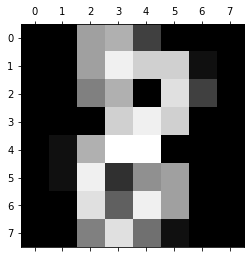

In [3]:
ind =  28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])   #บอกความเข้มขอสี

# Quiz 3 march
- แบ่ง data ออกเป็น 80(80) 20(test)  โดยใช้ random_state = 9
- หา parameter ที่ดีที่สุด  (K (1,3,5)) Distance_weighted (yes/no) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด test data

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

## model selection 

In [7]:
# model 1  (K = 1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K1weighted', scores.mean())

# model 3  (K = 3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K3weighted', scores.mean())

# model 3  (K = 3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K3weighted', scores.mean())

# model 4  (K = 1, No weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K1NOweighted', scores.mean())

# model 5  (K = 3, No weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K3NOweighted', scores.mean())

# model 6  (K = 5, No weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K5NOweighted', scores.mean())

Mean cross-validation score: K1weighted 0.9853972416472419
Mean cross-validation score: K3weighted 0.9840132090132091
Mean cross-validation score: K3weighted 0.9840132090132091
Mean cross-validation score: K1NOweighted 0.9853972416472419
Mean cross-validation score: K3NOweighted 0.9833187645687647
Mean cross-validation score: K5NOweighted 0.9833139083139084


# Evaluate with test set 

In [8]:
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Accuracy score:  0.9916666666666667


# HW 7
หา โมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

## วิธีที่  1

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# (K = 5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print('Mean cross-validation score: K5weighted', scores.mean())

# (K = 5, No weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)

print('Mean cross-validation score: K5Noweighted', scores.mean())
#-------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
model = DecisionTreeClassifier(random_state=1) # define model
# Define the k-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)  # k = จำนวนของกลุ่ม // n_splits=10, คือ k = 10  #shuffle=True คือให้มันสลับ  #random_state=42 กำหนดเลขเพื่อให้คำตอบเราเหมือนกับเพื่อน ๆ 
# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=kf)  # ทำ cross va (อยากรู้ว่า modelคืออะไร, x  8 คืออะไร , yคืออะไร ,วิธี cross va คืออะไร)
# Print the average accuracy and standard deviation across all folds
print('Mean cross-validation score: DecisionTree_KFold', scores.mean()) # ผลออกมาจะเป็นความแม่นยำ ของแต่ละ fold แล้วเอามาหา ค่าเฉลี่ย 


model = DecisionTreeClassifier(criterion = 'entropy' , min_samples_split = 5,random_state=1) # define model
# Define the k-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)  # k = จำนวนของกลุ่ม // n_splits=10, คือ k = 10  #shuffle=True คือให้มันสลับ  #random_state=42 กำหนดเลขเพื่อให้คำตอบเราเหมือนกับเพื่อน ๆ 
# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=kf)  # ทำ cross va (อยากรู้ว่า modelคืออะไร, x  8 คืออะไร , yคืออะไร ,วิธี cross va คืออะไร)
# Print the average accuracy and standard deviation across all folds
print('Mean cross-validation score: DecisionTree_KFold_entropy', scores.mean()) # ผลออกมาจะเป็นความแม่นยำ ของแต่ละ fold แล้วเอามาหา ค่าเฉลี่ย 

from sklearn.model_selection import cross_val_score,LeaveOneOut
model = DecisionTreeClassifier(random_state=1)
# Define the k-fold cross validation
LOO = LeaveOneOut()
# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=LOO)
# Print the average accuracy and standard deviation across all folds
print('Mean cross-validation score: DecisionTree_LOO', scores.mean()) # ผลออกมาจะเป็นความแม่นยำ ของแต่ละ fold แล้วเอามาหา ค่าเฉลี่ย 

# Define model
model = DecisionTreeClassifier(criterion = 'entropy' , min_samples_split = 5,random_state=1)
# Define the k-fold cross validation
LOO = LeaveOneOut()
# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=LOO)
# Print the average accuracy and standard deviation across all folds
print('Mean cross-validation score: DecisionTree_LOO_entropy', scores.mean()) # ผลออกมาจะเป็นความแม่นยำ ของแต่ละ fold แล้วเอามาหา ค่าเฉลี่ย 

#------------------------------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: Naive Bayes_var-9', scores.mean())

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB(var_smoothing = 1e-7)
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: Naive Bayes_var-7', scores.mean())

#-------------------------------------------------------------------------------------------------------

from sklearn.neural_network import MLPClassifier
# Create a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes = (10, 10), activation = 'relu',max_iter = 1000, random_state=1)\
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: Multi-layer Perceptron_relu', scores.mean())

# Create a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes = (20, 20), activation = 'tanh',max_iter = 1000, random_state=1)
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: Multi-layer Perceptron_tanh', scores.mean());

Mean cross-validation score: K5weighted 0.9840132090132091
Mean cross-validation score: K5Noweighted 0.9833139083139084
Mean cross-validation score: DecisionTree_KFold 0.8357857420357421
Mean cross-validation score: DecisionTree_KFold_entropy 0.8587412587412586
Mean cross-validation score: DecisionTree_LOO 0.8580375782881002
Mean cross-validation score: DecisionTree_LOO_entropy 0.837160751565762
Mean cross-validation score: Naive Bayes_var-9 0.8399184149184149
Mean cross-validation score: Naive Bayes_var-7 0.8733294483294483
Mean cross-validation score: Multi-layer Perceptron_relu 0.9450417637917636
Mean cross-validation score: Multi-layer Perceptron_tanh 0.9464112276612276


## วิธีที่ 2

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Load digits dataset
digits = load_digits()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=1)

# Define parameter sets for each model
dt_params_1 = {'random_state': 1}
dt_params_2 = {'criterion': 'entropy', 'min_samples_split': 5, 'random_state': 1}
nb_params_1 = {}
nb_params_2 = {'var_smoothing' : 1e-7}
knn_params_1 = {'n_neighbors': 5,'weights':'distance'}
knn_params_2 = {'n_neighbors': 3,'weights':'uniform'}
ann_params_1 = {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'max_iter': 1000, 'random_state': 1}
ann_params_2 = {'hidden_layer_sizes': (20, 20), 'activation': 'tanh', 'max_iter': 1000, 'random_state': 1}

# Train and evaluate models using each parameter set
models = [
    ('DT1', DecisionTreeClassifier(**dt_params_1)),
    ('DT2', DecisionTreeClassifier(**dt_params_2)),
    ('NB1', GaussianNB(**nb_params_1)),
    ('NB2', GaussianNB(**nb_params_2)),
    ('KNN1', KNeighborsClassifier(**knn_params_1)),
    ('KNN2', KNeighborsClassifier(**knn_params_2)),
    ('ANN1', MLPClassifier(**ann_params_1)),
    ('ANN2', MLPClassifier(**ann_params_2))
]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f'{name} Mean Cross-Validation Score: {scores.mean()}') 

DT1 Mean Cross-Validation Score: 0.8315753690753691
DT2 Mean Cross-Validation Score: 0.8483100233100233
NB1 Mean Cross-Validation Score: 0.8399184149184149
NB2 Mean Cross-Validation Score: 0.8733294483294483
KNN1 Mean Cross-Validation Score: 0.9840132090132091
KNN2 Mean Cross-Validation Score: 0.9833187645687647
ANN1 Mean Cross-Validation Score: 0.9450417637917636
ANN2 Mean Cross-Validation Score: 0.9464112276612276


## Evaluate with test set 

In [14]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train,y_train)
y_pred = knn_distance.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Accuracy score:  0.9944444444444445
